In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv(r"E:\DataScience-data\drug200.csv")

In [3]:
df.shape

(200, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(200, 6)

In [9]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [10]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
#univariate 
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [14]:
a=['Sex', 'BP','Cholesterol', 'Drug']
b=['Na_to_K','Age']

M    104
F     96
Name: Sex, dtype: int64


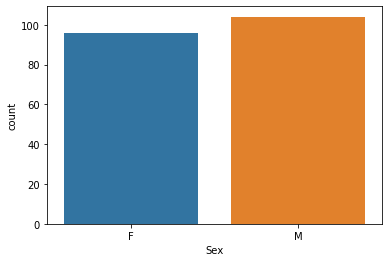

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


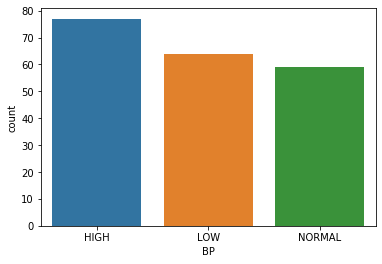

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


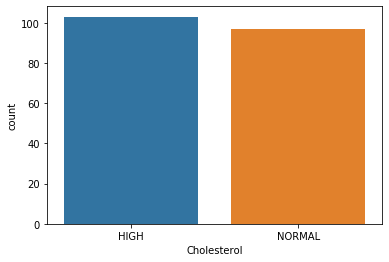

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64


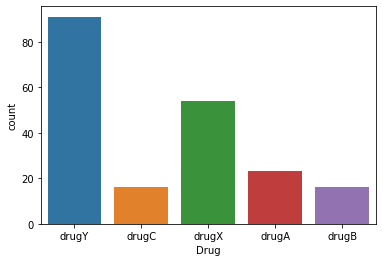

In [15]:
for i in a:
    print(df[i].value_counts())
    sns.countplot(x=i,data=df)
    plt.show()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64
1.039341186028881


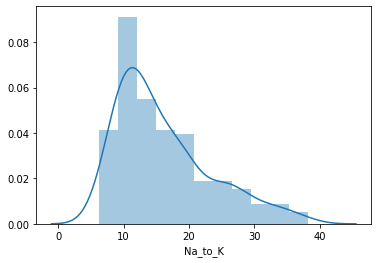

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64
0.03030835703000607


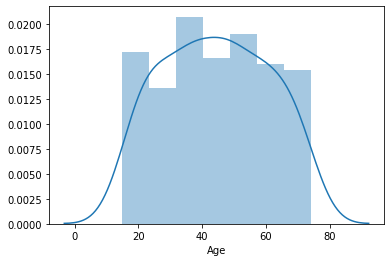

In [16]:
for i in b:
    print(df[i].describe())
    print(df[i].skew())
    sns.distplot(df[i])
    plt.show()

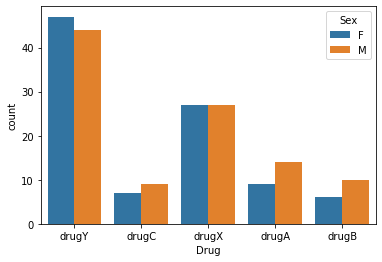

Drug  drugA  drugB  drugC  drugX  drugY  All
Sex                                         
F         9      6      7     27     47   96
M        14     10      9     27     44  104
All      23     16     16     54     91  200


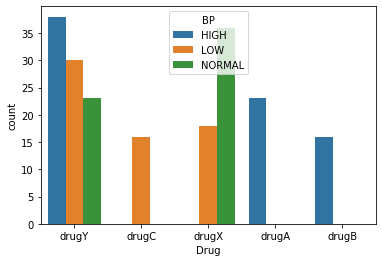

Drug    drugA  drugB  drugC  drugX  drugY  All
BP                                            
HIGH       23     16      0      0     38   77
LOW         0      0     16     18     30   64
NORMAL      0      0      0     36     23   59
All        23     16     16     54     91  200


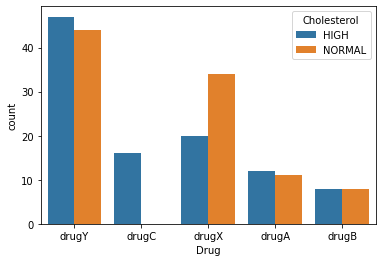

Drug         drugA  drugB  drugC  drugX  drugY  All
Cholesterol                                        
HIGH            12      8     16     20     47  103
NORMAL          11      8      0     34     44   97
All             23     16     16     54     91  200


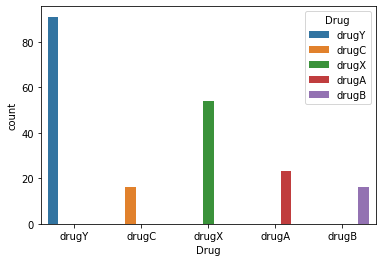

Drug   drugA  drugB  drugC  drugX  drugY  All
Drug                                         
drugA     23      0      0      0      0   23
drugB      0     16      0      0      0   16
drugC      0      0     16      0      0   16
drugX      0      0      0     54      0   54
drugY      0      0      0      0     91   91
All       23     16     16     54     91  200


In [20]:
for i in a:
    new=pd.crosstab(df[i],df["Drug"],margins=True)
    sns.countplot(x="Drug",hue=i,data=df)
    plt.show()
    print(new)
    

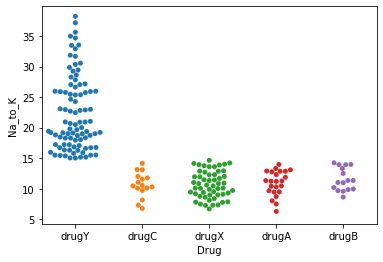

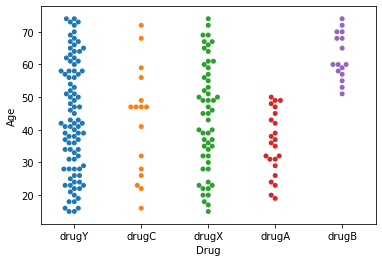

In [21]:
for i in b:
    sns.swarmplot(x='Drug',y=i,data=df)
    plt.show()

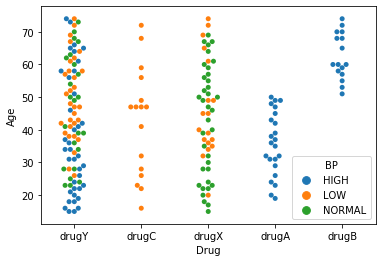

In [22]:
sns.swarmplot(x='Drug',y=i,hue='BP',data=df)
plt.show()

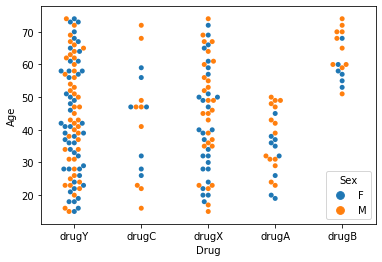

In [24]:
sns.swarmplot(x='Drug',y=i,hue='Sex',data=df)
plt.show()

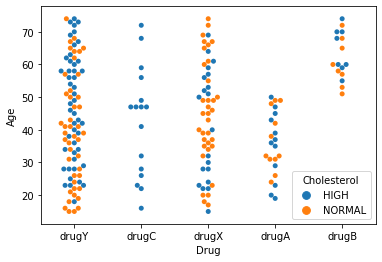

In [25]:
sns.swarmplot(x='Drug',y=i,hue='Cholesterol',data=df)
plt.show()

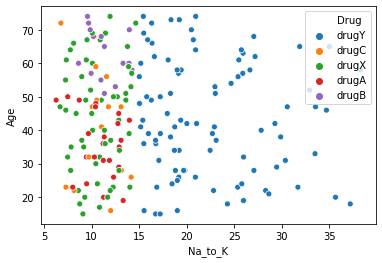

In [26]:
sns.scatterplot(x='Na_to_K',y='Age',hue='Drug',data=df)
plt.show()

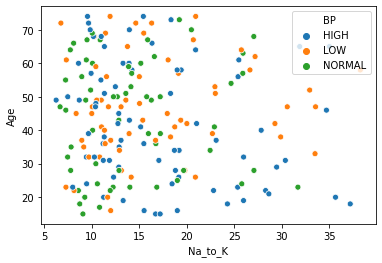

In [27]:
sns.scatterplot(x='Na_to_K',y='Age',hue='BP',data=df)
plt.show()

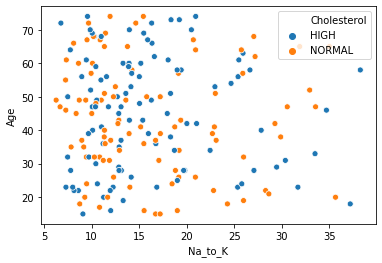

In [28]:
sns.scatterplot(x='Na_to_K',y='Age',hue='Cholesterol',data=df)
plt.show()

In [61]:
x=df.drop('Drug',axis=1)
y=df['Drug']


In [62]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [63]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
l2=LabelEncoder()
l3=LabelEncoder()

In [64]:
x["Sex"]=l1.fit_transform(x["Sex"])
x["BP"]=l2.fit_transform(x["BP"])
x["Cholesterol"]=l3.fit_transform(x["Cholesterol"])
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [65]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [66]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(160, 5)
(160,)
(40, 5)
(40,)


In [67]:
from sklearn.tree import DecisionTreeClassifier
algo=DecisionTreeClassifier(criterion='entropy')
algo.fit(xtrain,ytrain)
ypred=algo.predict(xtest)

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(ytest,ypred))
print(accuracy_score(ytest,ypred))

[[ 3  0  0  0  0]
 [ 1  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 22]]
0.975


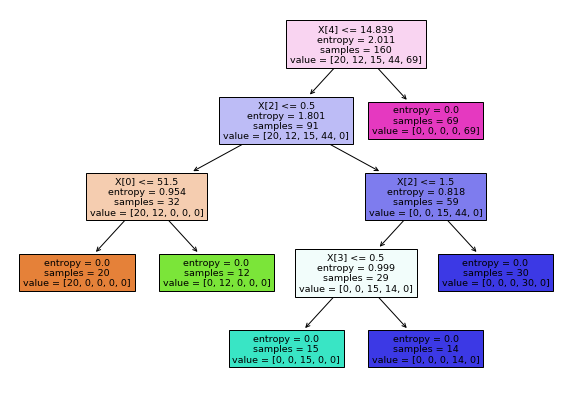

In [69]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(algo,filled=True)
plt.show()

In [70]:
import joblib
joblib.dump(algo,r"E:\DataScience-data\tree.pkl")
joblib.dump(l1,r"E:\DataScience-data\tree-l1.pkl")
joblib.dump(l2,r"E:\DataScience-data\tree-l2.pkl")
joblib.dump(l3,r"E:\DataScience-data\tree-l3.pkl")

['E:\\DataScience-data\\tree-l3.pkl']